###  목표
- 선형회귀 이론에 대해서 알아보자
- 선형회귀모델의 원리를 직접 구현
- 공부시간에 따른 성적데이터 예측
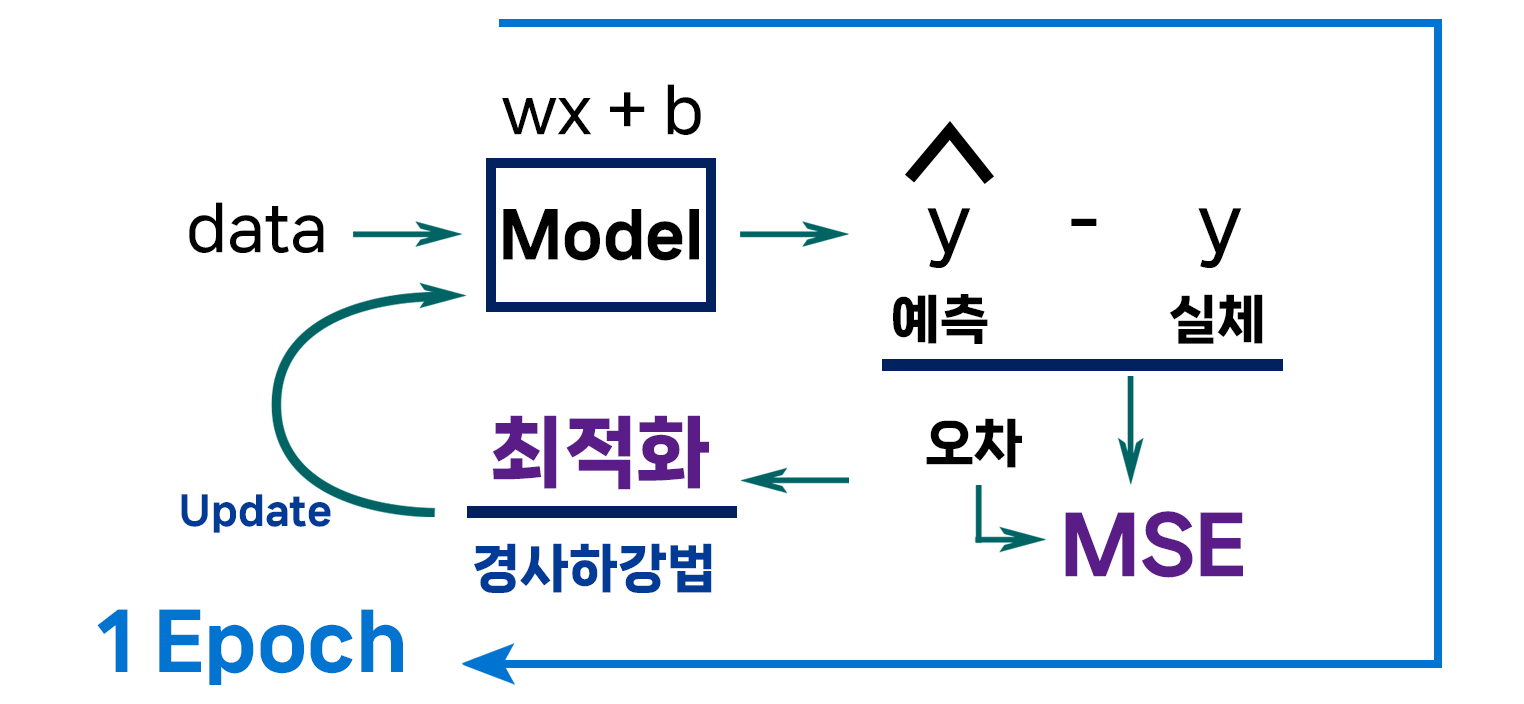
 

In [1]:
# 기본라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [2]:
# 공부시간에 따른 성적데이터 DataFrame 만들기
data=pd.DataFrame({'시간':[2,4,8,9],'성적':[20,40,80,90]},
            index = ['지원','대길','정훈','승혁'])
data

,시간,성적
지원,2,20
대길,4,40
정훈,8,80
승혁,9,90


### 선형회귀모델 실습
- LinearRegression
    - 단순 수학공식(MSE)을 활용하여 직선을 찾아나가는 방법
    - 단순 선형회귀

In [3]:
# 모델 불러오기
from sklearn.linear_model import LinearRegression

In [4]:
# 모델 객체 생성
linear_model=LinearRegression()

In [5]:
# 모델학습
# 모델명.fit(시간,성적) ✨시간(문제) 데이터는 반드시 2차원 !!

linear_model.fit(data[['시간']],data[['성적']])

LinearRegression()

In [6]:
# 모델 예측
# 모델명.predict(문제)
linear_model.predict([[7]])

# 모델이 예측한 가중치(w) , 절편(b)확인
# y= wx+b -> 우리가 예상한 그래프 y=10x+0 

c:\Users\smhrd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[70.]])

In [7]:
print("w값 : ",linear_model.coef_)
print("b값 : ",linear_model.intercept_)
# 절편값이 부동소수점 : 뒤에있는 숫자만큼 앞으로 이동

w값 :  [[10.]]
b값 :  [7.10542736e-15]


### 경사하강법
- 선형모델 MSE가 최소가 되는 w(가중치), b(절편)을 찾는 방법
- 찾고자 하는 값에 변화에 따른 비용함수(cost)
  - 비용함수 : 원래의 값과 가장 오차가 적은 가설함수를 도출하기 위해 사용하는 함수 

- 가중치 변화에 따른 MSE 변화 그래프 확인

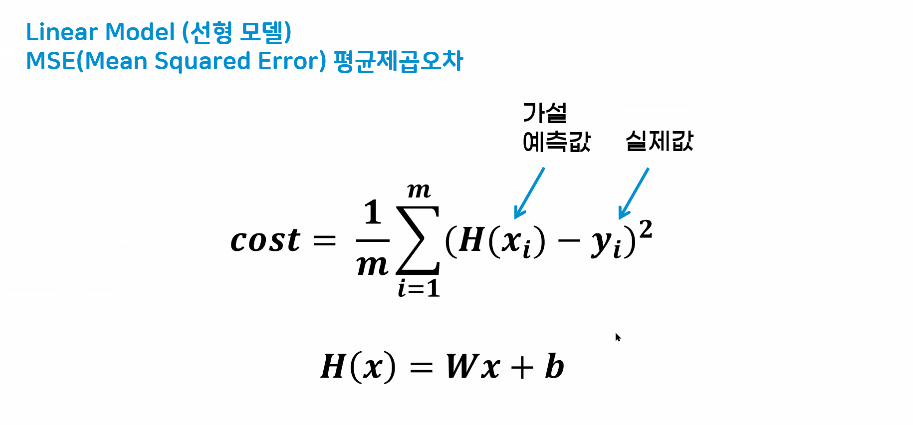

In [9]:
# 가설함수 설정 (예측값)
def h(w, x):
    return w * x + 0 

In [10]:
# 비용함수 (MSE)
# def cost (예측값, 실제값, 가중치)
# ((예측값 - 실제값) ** 2 ).mean() = MSE
def cost(data, target, weight): # data: 예측할 x값
    y_pre = h(weight, data)# 이 수식에 의해서 예측값이 나오게 된다 
    mse = ((y_pre - target)**2).mean()
    return mse

In [ ]:
# 예측한 가중치 w가 10일 때 MSE 값은 ? > -0
# y = 10 * x + 0
cost(data['시간'], data['성적'], 10)

In [13]:
# 예측한 가중치가 5인 경우
cost(data['시간'], data['성적'], 5)

1031.25

In [12]:
# 예측한 가중치가 3일 경우
cost(data['시간'], data['성적'], 3)

2021.25

In [14]:
# w값에 따른 mse 변화율 그래프 그려보기! 
w_arr = range(-10, 31) # -10 ~ 30
# 가중치 변화에 따른 mse 값을 리스트에 저장 
cost_list = []
for w in w_arr:
    c = cost(data['시간'], data['성적'], w)
    cost_list.append(c)
cost_list   

[16500.0,
 14891.25,
 13365.0,
 11921.25,
 10560.0,
 9281.25,
 8085.0,
 6971.25,
 5940.0,
 4991.25,
 4125.0,
 3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25,
 4125.0,
 4991.25,
 5940.0,
 6971.25,
 8085.0,
 9281.25,
 10560.0,
 11921.25,
 13365.0,
 14891.25,
 16500.0]

Text(0, 0.5, 'mse')

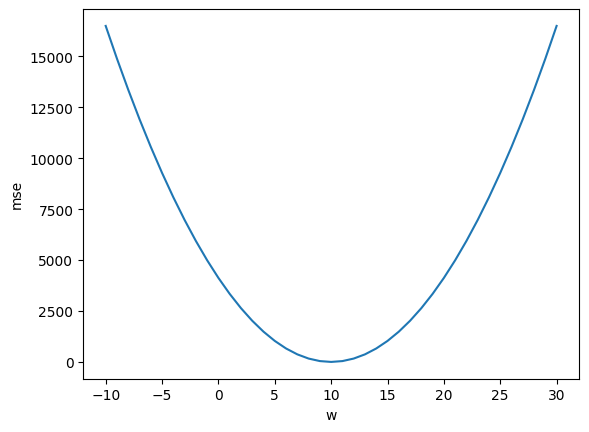

In [15]:
# 그래프 출력
plt.plot(w_arr, cost_list)
plt.xlabel('w')
plt.ylabel('mse')

### SGDRegressor
- Stochastic Gradient Desecent 확률적 경사하강법
- 사이킷런에서 구성해놓은 경사하강법을 활용한 선형회귀모델
- 경사하강법을 이용하는 모델

In [16]:
# 모델 불러오기
from sklearn.linear_model import SGDRegressor

In [30]:
# 모델 객체생성
sgd_model = SGDRegressor(eta0=0.001, # learning_rate : 학습률
                         max_iter=500, # 반복횟수, 업데이트 횟수
                         verbose=1) # 진행상황 출력

In [31]:
# 모델 학습 
sgd_model.fit(data[['시간']], data[['성적']])

-- Epoch 1
Norm: 1.27, NNZs: 1, Bias: 0.179911, T: 4, Avg. loss: 1887.316830
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.17, NNZs: 1, Bias: 0.302854, T: 8, Avg. loss: 1462.633182
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.87, NNZs: 1, Bias: 0.399333, T: 12, Avg. loss: 1179.839218
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.45, NNZs: 1, Bias: 0.480090, T: 16, Avg. loss: 979.605481
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.95, NNZs: 1, Bias: 0.550014, T: 20, Avg. loss: 826.214691
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.40, NNZs: 1, Bias: 0.611292, T: 24, Avg. loss: 702.532432
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.79, NNZs: 1, Bias: 0.665633, T: 28, Avg. loss: 600.751582
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.14, NNZs: 1, Bias: 0.714416, T: 32, Avg. loss: 517.617218
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.46, NNZs: 1, Bias: 0.758396, T: 36, Avg. loss: 448.632594
Total training time: 0.00 

c:\Users\smhrd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.001, max_iter=500, verbose=1)

In [32]:
# 모델 예측
sgd_model.predict([[7]])

c:\Users\smhrd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([69.88138079])

In [26]:
# 가중치 절편 확인 
print('w(가중치): ', sgd_model.coef_)
print('b(절편): ', sgd_model.intercept_)
# 예측직선 : y = 9x + 1 

w(가중치):  [7.97034053]
b(절편):  [1.10615709]


### 호주 집 가격 예측 
- 회귀모델

In [35]:
# 데이터 로드 읽어오기
house_data = pd.read_csv('data/melb_data.csv')
house_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [38]:
# 요약정보 확인
house_data.info()

# 20개 특성, 1개 정답(Price) => 21개 컬럼 
# 1. 결측치 유무 확인 => 있음 
# 2. 데이터 타입 확인(숫자 형태의 데이터만 학습 가능)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [52]:
# 모델링을 위한 특성 선택 
# => 정답데이터(Price)와 상관관계가 높은 컬럼 5개 선택
house_data.corr(numeric_only=True)

# 상관관계가 높은 1) Rooms 2) Bedroom2 3) Bathroom 4) Yearbuilt 5) Lattitude(위도) 6) Distance(시내와의 거리)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


In [97]:
# 특성선택 5개 
feature_name = ['Rooms', 'Bedroom2', 'Bathroom',  'Lattitude', 'Distance']

In [98]:
# 문제
X = house_data[feature_name]

# 정답
y = house_data['Price']


In [99]:
# 훈련용, 평가용 데이터로 분리 

from sklearn.model_selection import train_test_split
# train, test 분리 도구


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                     test_size=0.3, 
                                                     random_state=2024)

In [101]:
# 크기 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9506, 5) (9506,)
(4074, 5) (4074,)


In [102]:
# 모델 생성 
# 단순 mse 활용 선형회귀모델 => house_linear_model
house_linear_model = LinearRegression()
# 경사하강법 활용 선형회귀모델(하이퍼파라미터 조절X) => house_sgd_model
house_sgd_model = SGDRegressor()

In [103]:
# 학습
house_linear_model.fit(X_train, y_train)
house_sgd_model.fit(X_train, y_train)

SGDRegressor()

In [104]:
# 평가지표(mse)
from sklearn.metrics import mean_squared_error # 평균제곱 오차
# metrics : 평기지표 모음

In [105]:
# 예측 
linear_pre = house_linear_model.predict(X_test)

In [108]:
# 평가
# mean_squared_error(실제답, 예측값)
print('linear_model: ', mean_squared_error(y_test, linear_pre))

linear_model:  238001803062.00674


In [113]:
# sgd_model의 평가 및 mse 확인 
sgd_pre = house_sgd_model.predict(X_test)
print('sgd_mse : ', mean_squared_error(y_test, sgd_pre))
# 단순 linear 모델보다 오차가 큰 것을 확인
# sgd 모델은 경사하강법을 활용 => 초기 값을 랜덤으로 설정
# 평가 결과가 달라질 수 있음!

sgd_mse :  1210084135742.184


In [114]:
# 오차를 제곱하다보니 결과도 제곱하여 출력됨 => 단위문제
# 해결하기 위해서 오차에 루트 씌우기 
# RMSE
print('linear_mse: ', mean_squared_error(y_test, linear_pre)**0.5)
print('sgd_mse: ', mean_squared_error(y_test, sgd_pre)**0.5)
# 약 48만달러의 오차가 있음 


linear_mse:  487854.2846609085
sgd_mse:  1100038.2428543947


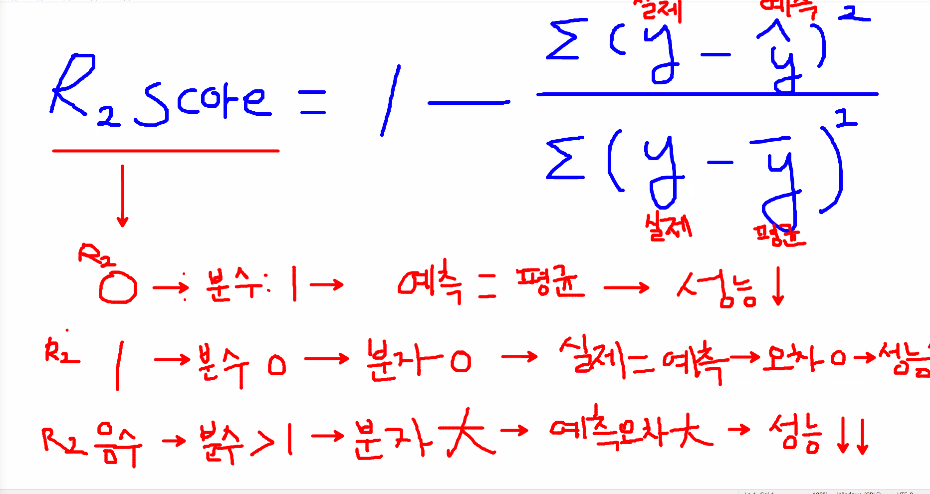

### 회귀모델의 평가지표
- MSE(MeanSquaredError, 평균제곱오차)
  - 실제 데이터와 예측 데이터의 차이 제곱 -> 평균
- RMSE(RootMeanSquaredError)
  - MSE에 루트를 씌워줌으로써 단위문제를 해결
- MAE(MeanAbsoluteError)
  - 실제 데이터와 예측 데이터의 차이 절대값 => 평균(부호)
- r2 score
  - 위 3개의 지표들은 오차로 판단하기 때문에 공통적인 평가방법이 아님. 따라서, 정규화된 방법으로 회귀모델을 평가하기 위하여 나온 평가지표
  - 실제값과 예측값의 분산비교
  - 실제 데이터에서의 오차와 예측 데이터에서의 오차 비교
  - 1에 가까울수록 잘 예측했다고 판별 

In [115]:
# r2 score 구해보기
# 오차로만 성능을 파악하기에는 비교대상이 XX
# 실제 데이터에서 오차와 예측데이터에서 오차를 비교하여 차이를 확인 =>  1에 가까울수록 잘 예측했다고 판단 할 수 있음
print('Linear score: ', house_linear_model.score(X_test, y_test))
print('SGD score: ', house_sgd_model.score(X_test, y_test))

Linear score:  0.43074235972287656
SGD score:  -1.8943042900809943


### 스케일링 적용
- 선형모델 : 각 특성에 스케일에 영향을 받는 모델 (오차계산 => 거리계산)
- 경사하강법 적용 시 학습의 안정성을 위해서 스케일링을 진행

In [116]:
# 도구 불러오기
from sklearn.preprocessing import StandardScaler

In [117]:
# 스케일러 생성
std_scaler = StandardScaler()

In [119]:
# 스케일러 => X_train에 대해서 학습 => 변환
X_train_scale = std_scaler.fit_transform(X_train)
X_test_scale = std_scaler.transform(X_test)

In [212]:
# 다시 모델 학습 및 평가 

# linear_model2
linear_model2 = LinearRegression()
linear_model2.fit(X_train_scale, y_train)
# sgd_model2
sgd_model2 = SGDRegressor(eta0=0.001)
sgd_model2.fit(X_train_scale, y_train)

# 평가 (r2 score)
print('스케일링 진행한 linear score: ', linear_model2.score(X_test_scale, y_test))
print('스케일링 진행한 sgd score: ', sgd_model2.score(X_test_scale, y_test))

스케일링 진행한 linear score:  0.43074235972287545
스케일링 진행한 sgd score:  0.4292160689685376


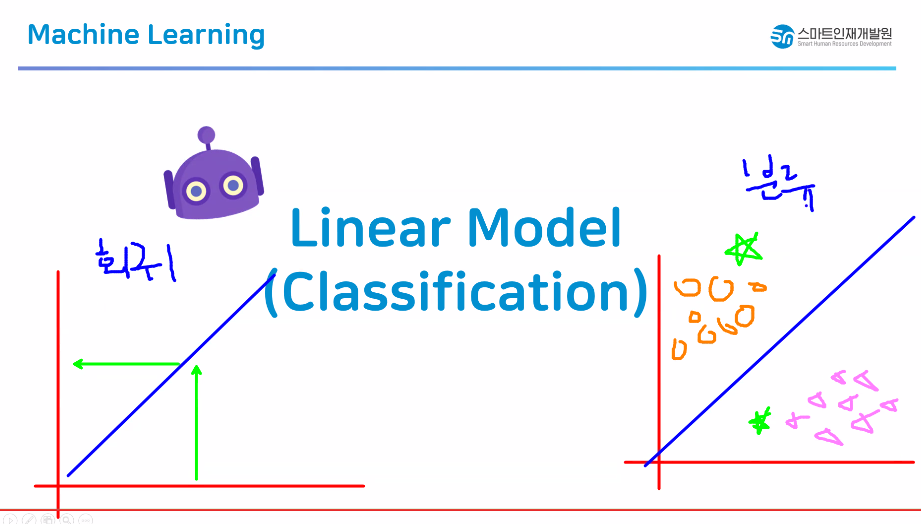

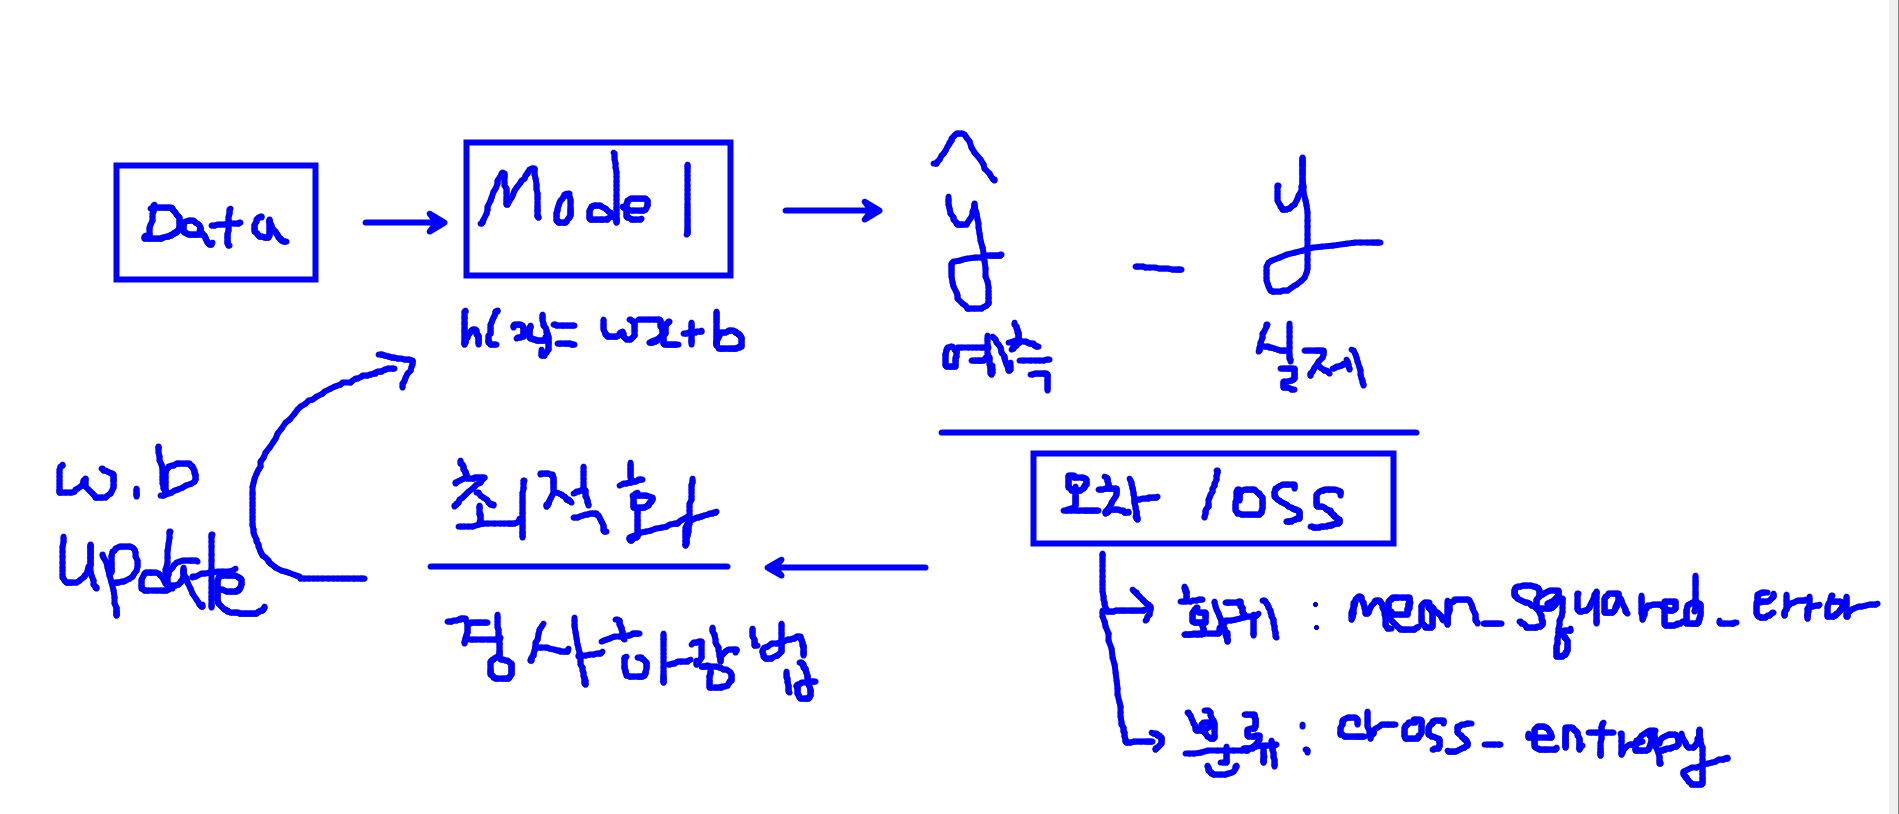